In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

2023-05-17 15:09:55.302086: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-17 15:09:55.371998: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-17 15:09:55.373219: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-17 15:09:56.642037: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


normalizovat data (kvuli aktivacnim funkcim)

(99840, 28, 28)
(99840,)
(24960, 28, 28)
(24960,)


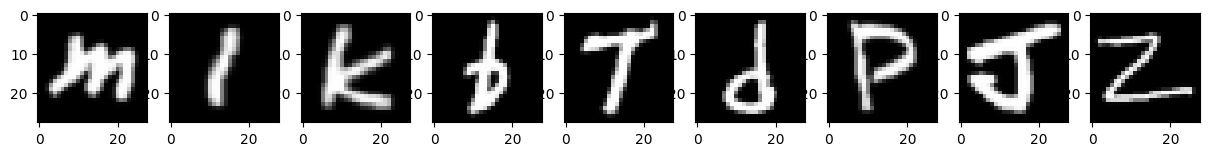

In [15]:
# train_data, test_data = tf.keras.datasets.mnist.load_data()
# X_tr, y_tr = train_data
# X_test, y_test = test_data
X_tr, X_test, y_tr, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
print(f"{X_tr.shape}")
print(f"{y_tr.shape}")
print(f"{X_test.shape}")
print(f"{y_test.shape}")
fig, axs = plt.subplots(1, 9, figsize=(15, 3))
for index, ax in enumerate(axs):
    ax.imshow(X_tr[index], cmap="gray")
plt.show()

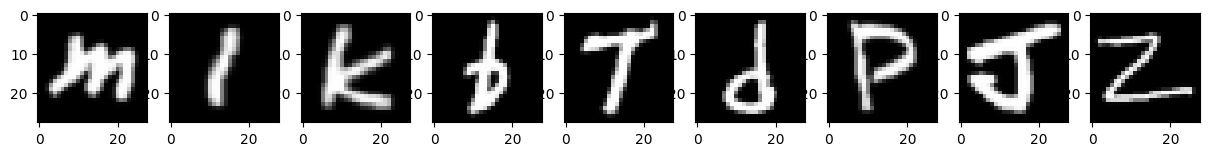

In [14]:
# CATEGORIES = 10
# # Normalizace <0,255> -> <0,1>
# X_tr = X_tr / 255.0
# X_test = X_test / 255.0
# # Prevod matic 28*28 na vektory
# X_tr_vec = X_tr.reshape(-1, 28 * 28)
# X_test_vec = X_test.reshape(-1, 28 * 28)
# print(X_tr_vec.shape)
# print(X_test_vec.shape)
# # prevod na kategoricke promenne
# y_tr_cat = tf.keras.utils.to_categorical(
#     y_tr, CATEGORIES
# )  # preved na matici vystupu [1] -> [0,1,0,0,0]
# y_test_cat = tf.keras.utils.to_categorical(y_test, CATEGORIES)

X_tr, X_test, y_tr, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

X_tr = X_tr/255.0
X_test = X_test/255.0

X_tr_vec = X_tr.reshape(-1, 28 * 28)
X_test_vec = X_test.reshape(-1, 28 * 28)

INPUT_SHAPE = (28, 28, 1)
CATEGORIES = 27

y_tr_cat = tf.keras.utils.to_categorical(
    y_tr, CATEGORIES
)  # preved na matici vystupu [1] -> [0,1,0,0,0]
y_test_cat = tf.keras.utils.to_categorical(y_test, CATEGORIES)

fig, axs = plt.subplots(1, 9, figsize=(15, 3))
for index, ax in enumerate(axs):
    ax.imshow(X_tr[index], cmap="gray")
plt.show()

In [16]:
from tensorflow.keras import models, layers
from tensorflow import keras


def get_model():
    model = models.Sequential()
    model.add(layers.Dense(units=64, input_shape=(784,), activation="relu"))
    model.add(layers.Dense(units=64, activation="relu"))
    model.add(layers.Dense(units=64, activation="relu"))
    model.add(layers.Dense(CATEGORIES, activation="softmax"))
    model.compile(
        loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam"
    )
    return model


EPOCHS = 5
model = get_model()
history = model.fit(X_tr_vec, y_tr_cat, epochs=EPOCHS, validation_split=0.1)

Epoch 1/5


2023-05-17 15:27:41.870204: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 281788416 exceeds 10% of free system memory.


2808/2808 [==============================] - 7s 2ms/step - loss: 0.8528 - accuracy: 0.7430 - val_loss: 0.5703 - val_accuracy: 0.8271
Epoch 2/5
2808/2808 [==============================] - 6s 2ms/step - loss: 0.4928 - accuracy: 0.8476 - val_loss: 0.4713 - val_accuracy: 0.8488
Epoch 3/5
2808/2808 [==============================] - 6s 2ms/step - loss: 0.4139 - accuracy: 0.8683 - val_loss: 0.4309 - val_accuracy: 0.8659
Epoch 4/5
2808/2808 [==============================] - 6s 2ms/step - loss: 0.3732 - accuracy: 0.8797 - val_loss: 0.4074 - val_accuracy: 0.8737
Epoch 5/5
2808/2808 [==============================] - 6s 2ms/step - loss: 0.3400 - accuracy: 0.8894 - val_loss: 0.3723 - val_accuracy: 0.8816


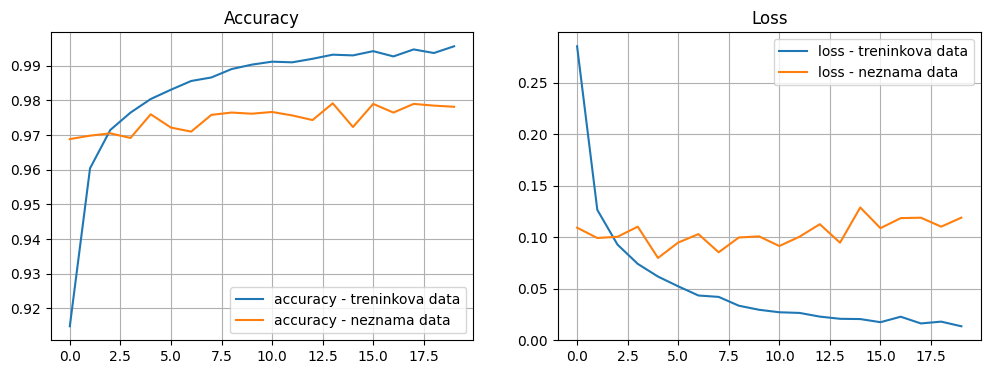

In [67]:
plt.rcParams["figure.figsize"] = [12, 4]
figure, axis = plt.subplots(1, 2)
axis[0].plot(history.history["accuracy"], label="accuracy - treninkova data")
axis[0].plot(history.history["val_accuracy"], label="accuracy - neznama data")
axis[0].grid()
axis[0].set_title("Accuracy")
axis[0].legend()

axis[1].plot(history.history["loss"], label="loss - treninkova data")
axis[1].plot(history.history["val_loss"], label="loss - neznama data")
axis[1].grid()
axis[1].set_title("Loss")
axis[1].legend()

In [68]:
from sklearn.metrics import confusion_matrix  # matice

yhat = model.predict(X_test_vec)
vysl = np.argmax(yhat, axis=1)
cm = confusion_matrix(y_test, vysl)
print(cm)
print("Ohodnoceni na testovacich datech")
results = model.evaluate(X_test_vec, y_test_cat)
print("test loss, test acc:", results)

313/313 [==============================] - 0s 1ms/step
[[ 967    0    0    2    0    1    2    3    2    3]
 [   0 1119    6    2    0    3    4    1    0    0]
 [   1    3 1008    5    2    1    1    8    2    1]
 [   0    0    3  984    0    9    0    4    5    5]
 [   0    0    3    0  970    1    4    2    0    2]
 [   3    0    0    6    1  870    4    2    2    4]
 [   2    2    0    1    4    4  943    0    1    1]
 [   0    1    7    4    4    0    0 1007    0    5]
 [   3    3    4   14    4   11    2    6  923    4]
 [   1    1    0    6   16    4    0    4    1  976]]
Ohodnoceni na testovacich datech
313/313 [==============================] - 0s 1ms/step - loss: 0.1233 - accuracy: 0.9767
test loss, test acc: [0.12332463264465332, 0.9767000079154968]


(99840, 28, 28)
(99840,)
(24960, 28, 28)
(24960,)


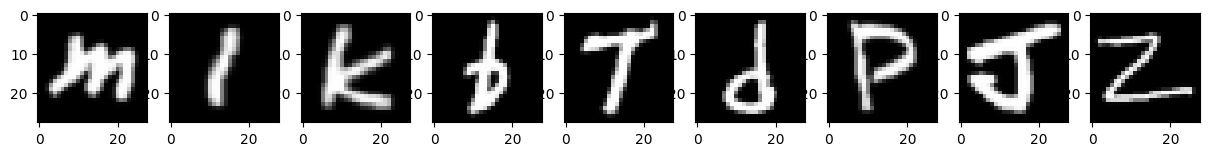

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random

from emnist import extract_training_samples
images, labels = extract_training_samples('letters')

# train_data, test_data = tf.keras.datasets.mnist.load_data()
# X_tr,y_tr = train_data
# X_test,y_test = test_data
# print(f'{X_tr.shape}')
# print(f'{y_tr.shape}')
# print(f'{X_test.shape}')
# print(f'{y_test.shape}')

# fig, axs = plt.subplots(1, 9, figsize=(15, 3))
# for index, ax in enumerate(axs):
#   ax.imshow(X_tr[index],cmap='gray')
# plt.show()

X_tr, X_test, y_tr, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
print(f"{X_tr.shape}")
print(f"{y_tr.shape}")
print(f"{X_test.shape}")
print(f"{y_test.shape}")
fig, axs = plt.subplots(1, 9, figsize=(15, 3))
for index, ax in enumerate(axs):
    ax.imshow(X_tr[index], cmap="gray")
plt.show()


In [8]:
# Normalizace <0,255> -> <0,1>
X_tr = X_tr/255.0
X_test = X_test/255.0

INPUT_SHAPE = (28, 28, 1)
CATEGORIES = 27

# prevod na kategoricke promenne
y_tr_cat = tf.keras.utils.to_categorical(y_tr, CATEGORIES)  # preved na matici vystupu [1] -> [0,1,0,0,0]
y_test_cat = tf.keras.utils.to_categorical(y_test, CATEGORIES)



In [9]:
from tensorflow.keras import models, layers

def get_model():
  model = models.Sequential()
  model.add(layers.Input(shape=INPUT_SHAPE))
  model.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu"))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Conv2D(64, kernel_size=(5, 5), activation="relu"))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(CATEGORIES, activation="softmax"))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model


EPOCHS = 5
model = get_model()
history = model.fit(X_tr, y_tr_cat, epochs=EPOCHS, validation_split=0.1)

2023-05-17 15:13:20.123158: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Epoch 1/5


2023-05-17 15:13:20.780144: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 281788416 exceeds 10% of free system memory.


2808/2808 [==============================] - 35s 12ms/step - loss: 0.6830 - accuracy: 0.7898 - val_loss: 0.3102 - val_accuracy: 0.9014
Epoch 2/5
2808/2808 [==============================] - 33s 12ms/step - loss: 0.3677 - accuracy: 0.8820 - val_loss: 0.2555 - val_accuracy: 0.9209
Epoch 3/5
2808/2808 [==============================] - 33s 12ms/step - loss: 0.3129 - accuracy: 0.8993 - val_loss: 0.2362 - val_accuracy: 0.9240
Epoch 4/5
2808/2808 [==============================] - 33s 12ms/step - loss: 0.2861 - accuracy: 0.9068 - val_loss: 0.2335 - val_accuracy: 0.9235
Epoch 5/5
2808/2808 [==============================] - 34s 12ms/step - loss: 0.2692 - accuracy: 0.9123 - val_loss: 0.2136 - val_accuracy: 0.9310


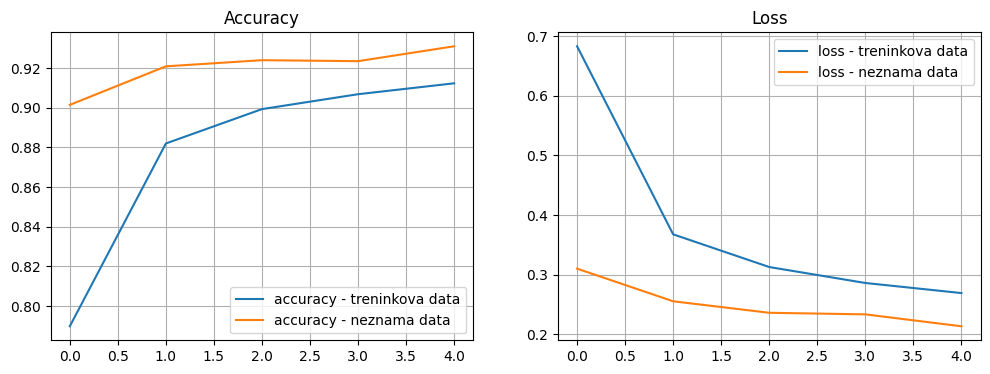

In [10]:
plt.rcParams["figure.figsize"] = [12,4]
figure, axis = plt.subplots(1, 2)
axis[0].plot(history.history['accuracy'], label='accuracy - treninkova data')
axis[0].plot(history.history['val_accuracy'], label='accuracy - neznama data')
axis[0].grid()
axis[0].set_title('Accuracy')
axis[0].legend()

axis[1].plot(history.history['loss'], label='loss - treninkova data')
axis[1].plot(history.history['val_loss'], label='loss - neznama data')
axis[1].grid()
axis[1].set_title('Loss')
axis[1].legend()

In [11]:
from sklearn.metrics import confusion_matrix # matice 
yhat = model.predict(X_test)
vysl = np.argmax(yhat,axis=1)
cm = confusion_matrix(y_test, vysl)
print(cm)

print("Ohodnoceni na testovacich datech")
results = model.evaluate(X_test, y_test_cat)
print("test loss, test acc:", results)

  1/780 [..............................] - ETA: 1:24

2023-05-17 15:16:28.111146: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 78274560 exceeds 10% of free system memory.


780/780 [==============================] - 3s 4ms/step
[[949   1   1   5   4   1   5   2   0   0   1   0   0   5   4   0  18   1
    1   2   1   0   2   0   0   5]
 [  5 904   0   2   0   0   3   6   0   0   0   2   0   0   1   0   3   0
    0   0   1   0   0   0   0   0]
 [  2   0 955   0  11   0   3   0   0   0   0   3   0   0   1   0   0   0
    0   0   2   0   0   0   0   0]
 [  3   5   0 894   0   0   2   3   0   7   0   0   0   1  26   2   2   0
    0   0   0   1   0   0   0   1]
 [  1   1   8   0 893   3   2   0   1   0   0   0   0   0   0   1   1   4
    0   0   1   0   0   1   0   2]
 [  1   0   1   1   2 932   5   0   1   1   0   1   0   0   0   3   1   3
    3  11   0   0   0   1   1   2]
 [ 20  10   5   1   2   1 754   0   0   2   0   0   0   0   0   2 105   1
    2   0   1   0   0   0   1   1]
 [  0   4   0   0   0   0   0 887   0   0   7  12   1  16   0   0   0   1
    2   0   0   0   3   0   0   0]
 [  0   0   0   1   0   2   1   0 579  16   0 333   0   0   0   0   0   0

2023-05-17 15:16:32.050913: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 78274560 exceeds 10% of free system memory.


780/780 [==============================] - 3s 4ms/step - loss: 0.2036 - accuracy: 0.9331
test loss, test acc: [0.20364835858345032, 0.9330929517745972]
